In [23]:
# Imports
import numpy as np 
from random import random
from random import seed
import networkx as nx
from networkx import karate_club_graph, to_numpy_matrix

In [24]:
# Convolution Layer
def gcn_layer(A, D, X, W):
    feature=D* A * D * X * W
    feature=np.maximum(0,feature)
    return feature
def computeweights(G):
    seed(1)
    W1 = np.random.normal(loc=0, scale=1, size=(G.number_of_nodes(), 6))
    seed(1)
    W2 = np.random.normal(loc=0, size=(W1.shape[1], 3))
    return W1,W2

def computedegreematrix(G):
    order = sorted(list(G.nodes()))
    #nx.draw(G, with_labels=True)
    A = nx.to_numpy_matrix(G, nodelist=order)
    I = np.eye(G.number_of_nodes())
    A_own = A + I
    D_own = np.array(np.sum(A_own, axis=0))[0]
    D_inv=D_own**-0.5
    #print(D_inv)
    D_inv = np.matrix(np.diag(D_inv))
    #print(D_inv)
    return A_own,D_inv,I 

In [28]:
G= karate_club_graph()
W1,W2 = computeweights(G)
A_own,D_inv,I = computedegreematrix(G)
H1 = gcn_layer(A_own, D_inv, I, W1)
H2 = gcn_layer(A_own, D_inv, H1, W2)
#H2

In [34]:
H1

matrix([[0.00628002, 0.        , 0.        , 0.        , 0.        ,
         0.        ],
        [0.09496139, 0.        , 0.07792515, 0.        , 0.42170812,
         0.        ],
        [0.45294948, 0.        , 0.        , 0.        , 0.36798735,
         0.        ],
        [0.00257384, 0.        , 0.        , 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , 0.        , 0.        ,
         0.2824819 ],
        [0.        , 0.        , 0.        , 0.        , 0.01008815,
         0.        ],
        [0.        , 0.46886663, 0.        , 0.        , 0.14535008,
         0.        ],
        [0.        , 0.        , 0.11602858, 0.        , 0.03216087,
         0.        ],
        [0.        , 0.1213933 , 0.        , 0.        , 0.83696985,
         0.        ],
        [0.03809431, 0.        , 0.26733328, 0.39946847, 0.45974185,
         0.        ],
        [0.        , 0.00844397, 0.        , 0.        , 0.        ,
         0.12585317],

the number of components 1
[ 0  1  3  4  5  6  7 10 11 12 13 16 17 19 21]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


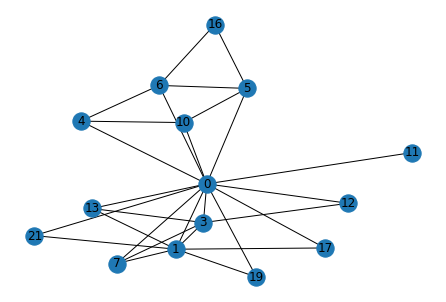

In [32]:
# remove edge to construct subgraphs
def edge_to_remove(G):
    dict1=nx.edge_betweenness_centrality(G)
    list_of_tuples=dict1.items()
    list_of_tuples=sorted(list_of_tuples,key=lambda X:X[1],reverse=True)
    return list_of_tuples[0][0]
#Girvan Algorithm
def girvan(G):
    c=list(nx.connected_component_subgraphs(G))
    l=len(c)
    print("the number of components",l)
    while(l==1):
        G.remove_edge(*edge_to_remove(G))
        c=list(nx.connected_component_subgraphs(G))
        l=len(c)
    return c
G= nx.karate_club_graph()
c=girvan(G)
k=1
for i in c:
    if k==1:
        test=i.copy()
    k=k+1
nx.draw(test, with_labels=True)
actual_node = np.array(sorted(list(test.nodes())))
print(actual_node)
predicted_node=np.zeros(len(actual_node))
print(predicted_node)

In [5]:
A_own,D_inv,I,W1,W2 = computeweights(test)
H11 = gcn_layer(A_own, D_inv, I, W1)
H21 = gcn_layer(A_own, D_inv, H11, W2)
H21

matrix([[1.17736711, 0.        , 0.        ],
        [0.70029899, 0.        , 0.        ],
        [0.54007153, 0.        , 0.        ],
        [0.78532134, 0.        , 0.        ],
        [0.87672932, 0.        , 0.        ],
        [0.96360111, 0.        , 0.        ],
        [0.47037482, 0.        , 0.        ],
        [0.80426215, 0.        , 0.        ],
        [0.59615309, 0.        , 0.        ],
        [0.36858929, 0.        , 0.        ],
        [0.54794601, 0.        , 0.        ],
        [0.76816127, 0.        , 0.        ],
        [0.50532653, 0.        , 0.        ],
        [0.4349315 , 0.        , 0.        ],
        [0.517622  , 0.        , 0.        ]])

In [6]:
similarity_matrix=H21*H2.T
max_value=np.array(similarity_matrix.max(1))
max_value[1]
#similarity_matrix.shape
#len(similarity_matrix)

array([0.06158965])

In [7]:
similarity_matrix[1,:]

matrix([[0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.00425869,
         0.        , 0.        , 0.        , 0.06158965, 0.        ,
         0.        , 0.        , 0.00709075, 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        ]])

In [8]:
similarity_matrix

matrix([[0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.00715986,
         0.        , 0.        , 0.        , 0.10354667, 0.        ,
         0.        , 0.        , 0.01192121, 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.00425869,
         0.        , 0.        , 0.        , 0.06158965, 0.        ,
         0.        , 0.        , 0.00709075, 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.        ,

In [14]:
def maxelement(arr,p): 
    # get number of rows and columns 
    no_of_rows = len(arr) 
    no_of_column = len(arr[0]) 
    for i in range(no_of_rows):   
        # Initialize max1 to 0 at beginning 
        # of finding max element of each row 
        max1 = 0
        for j in range(no_of_column): 
            if arr[i][j] > max1 : 
                max1 = arr[i][j]
                p[i]=j
            #print(max1)
            #print(predicted_node[i])
    return p


In [19]:
predicted_node=maxelement(np.array(similarity_matrix),predicted_node )
print("predicted node")
predicted_node
print("actual node")
actual_node

predicted node
actual node


array([ 0,  1,  3,  4,  5,  6,  7, 10, 11, 12, 13, 16, 17, 19, 21])

Zachary's Karate Club
the number of components 1
------------
------------


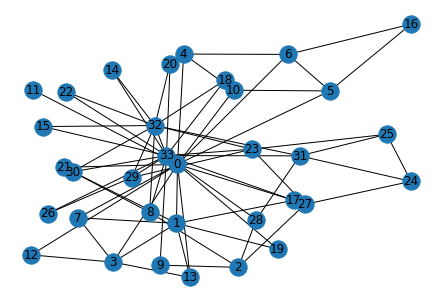

In [26]:
#Community Detection
# remove edge to construct subgraphs
def edge_to_remove(G):
    dict1=nx.edge_betweenness_centrality(G)
    list_of_tuples=dict1.items()
    list_of_tuples=sorted(list_of_tuples,key=lambda X:X[1],reverse=True)
    return list_of_tuples[0][0]
#Girvan Algorithm
def girvan(G):
    c=list(nx.connected_component_subgraphs(G))
    l=len(c)
    print("the number of components",l)
    while(l==1):
        G.remove_edge(*edge_to_remove(G))
        c=list(nx.connected_component_subgraphs(G))
        l=len(c)
        #print("the number of components",l)
    return c
G= nx.karate_club_graph()
print(G)
#print("Main Graph")
#nx.draw(G, with_labels=True)
c=girvan(G)
#print("Communities")
#nx.draw(G, with_labels=True)
for i in c:
    nx.draw(i, with_labels=True)
    A_own,D_inv,I,W1,W2 = computeweights(i)
    H11 = gcn_layer(A_own, D_inv, I, W1)
    H21 = gcn_layer(A_own, D_inv, H11, W2)
    H21
    print("------------")
#preperation of class label
y=np.zeros((G.number_of_nodes(),1))

k=0
for i in c:
    g1=list(i.nodes())
    for j in range(i.number_of_nodes()):
        y[g1[j]]=k
    #print("The Number of Nodes : ",i.number_of_nodes())
    #print(i.nodes())
    #print("---------")
    k=k+1
#print("Labels of class : ",y)

In [5]:
# Fully Connected Neural Network

# Class definition
class FullyConnectedNeuralNetwork:
    def __init__(self, x,y):
        self.input = np.array(x)
        self.weights1= np.random.rand(self.input.shape[1],4) # considering we have 4 nodes in the hidden layer
        self.weights2 = np.random.rand(4,1)
        self.y = y
        self.output = np.zeros(y.shape)
    # Activation function
    def sigmoid(self, x):
        return 1/(1+np.exp(-x))
    # Derivative of sigmoid
    def sigmoid_derivative(self, x):
        return (x * (1 - x))  
    #Feed Forward
    def feedforward(self):
        self.layer1 = self.sigmoid(np.dot(self.input, self.weights1))
        self.layer2 = self.sigmoid(np.dot(self.layer1, self.weights2))
        return self.layer2
    #Backpropagation 
    def backprop(self):
        d_weights2 = np.dot(self.layer1.T, 2*(self.y -self.output)*self.sigmoid_derivative(self.output))
        d_weights1 = np.dot(self.input.T, np.dot(2*(self.y -self.output)*
                     self.sigmoid_derivative(self.output), self.weights2.T)*self.sigmoid_derivative(self.layer1))
        self.weights1 += d_weights1
        self.weights2 += d_weights2
    #Train
    def classfication(self):
        fo=np.zeros(self.output.shape)
        j=0
        for i in self.output:
            if i>=0.5:
                fo[j]=1
            else:
                fo[j]=0
            j=j+1
        return fo
    def train(self):
        for i in range(100000):
            self.output = self.feedforward()
            self.backprop()
        finaloutput=self.classfication()
        #for i in finaloutput:
        print("Weights1:")
        print(self.weights1)
        print("-------------")
        print("Weights2:")
        print(self.weights2)
        print("-------------")
        print("Predictive Output:")
        print(self.output.T)
        print("Predictive Output class:")
        print(finaloutput.T)
        print("Actual Output:")
        print(self.y.T)        

In [6]:
nn=FullyConnectedNeuralNetwork(H2,y)
nn.train()

Weights1:
[[ 68.3854465  -87.79439126  -7.20286626  -6.23675942]
 [-32.79297103  69.64227336  14.35446537  13.66279634]
 [-75.91808719  65.72544215 -11.05985061 -11.60168985]]
-------------
Weights2:
[[ 43.96707491]
 [-30.76196801]
 [ 20.80181236]
 [ 17.37445294]]
-------------
Predictive Output:
[[4.36778171e-14 4.36778179e-14 9.97513513e-01 4.36778171e-14
  4.36778367e-14 4.36778171e-14 4.36778171e-14 4.36798922e-14
  1.00000000e+00 1.00000000e+00 4.36778853e-14 4.36778265e-14
  4.36778173e-14 2.63548094e-02 1.00000000e+00 9.40383808e-01
  4.36778171e-14 3.58080298e-13 1.00000000e+00 5.13863353e-01
  4.88527350e-01 3.75337248e-02 1.00000000e+00 1.00000000e+00
  9.99393069e-01 9.99367186e-01 1.00000000e+00 1.00000000e+00
  1.00000000e+00 1.00000000e+00 1.00000000e+00 9.96821360e-01
  9.99999999e-01 1.00000000e+00]]
Predictive Output class:
[[0. 0. 1. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 1. 1. 0. 0. 1. 1. 0. 0. 1. 1.
  1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]]
Actual Output:
[[0. 0. 1. 0. 0. 0. 0. 0